In [19]:
import math
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## General dataset setup

In [60]:
df = pd.read_csv('block.csv')
df.tail()

/Users/sidshekhar/opt/anaconda3/envs/datasci/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (13,14,15,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,slot,status,as_of,epoch,eth1data_depositcount,attestationscount,attesterslashingscount,depositscount,proposerslashingscount,...,voluntaryexitscount,blockroot,eth1data_blockhash,eth1data_depositroot,graffiti,graffiti_text,parentroot,randaoreveal,signature,stateroot
458978,102812,105386,1,19-08-2020 04:17,3293,35509,24,2,0,0,...,0,0xc2a5136c94f4c057d4b7b346eaf0ed312f182a407938d1962e760cc1d207d853,0xb0580226b6b25de9e661cde1809b2f28edaf808d5ea3a094e09567e3d10d8bc4,0xfbad01889d4b945e3c14e7c6d1b9380769e61d77b8cdc13bf40046bf43fb3801,0x0000000000000000000000000000000000000000000000000000000000000000,NaN,0x735b5d9faaa2060fd612b900a478a1f8f5b95ef398d42400e211aff196ae2541,0x8d605eb331974971ef724d52fc643f001ca1928503be58949f63e539579241e43031a1b6b78277647319147a1662e9160340fa710017ca3020c4e8af2fb86604674d3f47cc4fe32b24a6c39da43b933ba7aa8318365a366a86163e3ae2f4a03c,0xb4c730765b22bf314a5691640741c8a6953a916c6b9112b4ee820211b59d9080ed3cbb2fc13f0990df29956e92cff54c04dcc76b75e0e709e001b319f09141c6f0c773ad9429709cc10309ef5fa3f4440a02e807a85dbe524163da3ba3d2f037,0x5625f38518db7fa9658b321d595c965579f9b953366225906d187ce7b20d3356
458979,102820,105394,1,19-08-2020 04:18,3293,35509,55,2,0,0,...,0,0xf227e4dc66b09dfa73a28a9ff38ff28956b757995199a2450f74b88ce7eb4ce0,0xb0580226b6b25de9e661cde1809b2f28edaf808d5ea3a094e09567e3d10d8bc4,0xfbad01889d4b945e3c14e7c6d1b9380769e61d77b8cdc13bf40046bf43fb3801,0x0000000000000000000000000000000000000000000000000000000000000000,NaN,0xefc7c3b3c8746c70a9d97b7ddd04262b153a2443ef0e201c7829d740b3d88f90,0x8aa15e8511c5e489d39c6f85fbde6c2a72145225351319c08c197e1cb28e58a4d6623e2e3c44ea5fe2d2d1d909d57fe90117a6867c3834e0b229b519e9f4bda165e5f72ccc2c50a4363748ebd1c8a21b3130583b780ecca53280fb9220272fea,0x85e1c06cdca9a58eb2bbe7f94a391e8ec2c796c0de72b9b6afc5217e84760d5d28d254381143f6e3c19213aa205d6d12060bddedf82fe9060249c546278200b3dc8aeed53c736f8e48fe69ad80fdad5dc99e3c21c031e84dc3277c3952ac5728,0x8616964bd3add53dd4af8f171edcd2bb1348498ef91482a81f29898a0b525099
458980,102835,105409,1,19-08-2020 04:21,3294,35509,29,2,0,0,...,0,0x0a5f7f7f17bdd894941a9dfe909f5532fd901a56d649fb28227216d63a95e07c,0xb0580226b6b25de9e661cde1809b2f28edaf808d5ea3a094e09567e3d10d8bc4,0xfbad01889d4b945e3c14e7c6d1b9380769e61d77b8cdc13bf40046bf43fb3801,0x0000000000000000000000000000000000000000000000000000000000000000,NaN,0xac648c77b53d49c73b4b9ce8a82f6d0da26958fe31ec6bc5747dd1d13f4608cb,0x8ba7489e07c268de858b5e1a10a1b042a467cc44f6aae5fdf516606db2948d9be21292694f659e92a0d46eb57e5c1213121eb75b3c02bda3c1e27ccddee10fecdad62a1def07ee94da297fdee6c2ff4192e495fcbb4f836c248d06b2547d00a8,0x8faf98f5ddad8ed255dba3f41da39bd21c4e530100fc6f0309af9573436fa43df7cbf4151f57dcd22036c419685d1e840612ff59d426bfe43e5c415837d2df4cf4da89118373dfe529aaf216a78347d107f582409693fe3ef8766a42b72dd886,0x7d70d4b5f8887607679c76f48dde6abdee5cd2fed3527f105d1684c1b623841d
458981,102836,105410,1,19-08-2020 04:22,3294,35509,41,2,0,0,...,0,0x12e0d27749c658c830bed3741c3bce4572149ee4ded458598a07ccf5cff22771,0xb0580226b6b25de9e661cde1809b2f28edaf808d5ea3a094e09567e3d10d8bc4,0xfbad01889d4b945e3c14e7c6d1b9380769e61d77b8cdc13bf40046bf43fb3801,0x0000000000000000000000000000000000000000000000000000000000000000,NaN,0x0a5f7f7f17bdd894941a9dfe909f5532fd901a56d649fb28227216d63a95e07c,0x8edf62f2d2985fe3f3bb558a3a5a1d2c3b626e29e7ceb807a000e5cb14bb01722c17e5eee50df82d8ee24f39312535710ed757d821158debd1a537336b13e49a1352aafacf7ffb0ad483a6f4151fbb4dd63c31f9cbbb809aef2664172cc8f053,0xb22d03dc18f6a837514d2ebecac1125fd19a23aa23dc5b9e1180457adf739aad7fb488bcf7de26a3a1bfa4075f8a74370df359bc4e60896bff06f24ae1e2bd535da5f0a6c0f09dff7e50fcb339bf2eb663637c6ad92e914c7026c5a8faf28e96,0xd5d73c39bc550e279b60192ae9847066ac3177d2e6cfaa698e021d8a7dffa801
458982,102837,105411,1,19-08-2020 04:22,3294,35509,64,2,0,0,...,0,0xac03d11758cdd2d85210bc74cf0118122cd8838112aca7b3a023718c6ed74af4,0xb0580226b6b25de9e661cde1809b2f28edaf808d5ea3a094e09567e3d10d8bc4,0xfbad01889d4b945e3c14e7c6d1b9380769e61d77b8cdc13bf40046bf43fb3801,0x00000000000000

In [59]:
df.dtypes

id                          int64
slot                        int64
status                      int64
as_of                      object
epoch                       int64
eth1data_depositcount       int64
attestationscount           int64
attesterslashingscount      int64
depositscount               int64
proposerslashingscount      int64
proposer                    int64
voluntaryexitscount         int64
blockroot                  object
eth1data_blockhash         object
eth1data_depositroot       object
graffiti                   object
graffiti_text             float64
parentroot                 object
randaoreveal               object
signature                  object
stateroot                  object
dtype: object

In [61]:
# Number of blocks in dataset
df.shape[0]

458983

In [63]:
# Removing blocks with no graffiti
df_with_graffiti = df.dropna(subset=['graffiti'])
df_with_graffiti.shape[0]

334388

In [43]:
df_with_graffiti.head()

,id,slot,status,as_of,epoch,eth1data_depositcount,attestationscount,attesterslashingscount,depositscount,proposerslashingscount,...,voluntaryexitscount,blockroot,eth1data_blockhash,eth1data_depositroot,graffiti,graffiti_text,parentroot,randaoreveal,signature,stateroot
124595,2268,4772,1,05-08-2020 04:54,149,24141,128,0,16,0,...,0,0x252a42d9a1e0c68636d6bcaf180ac754f1ea78682153...,0x2f54e44752be3aa0a660b20b268438637af015074c94...,0x7beb4743970868509c2f42419c750cc145155e08c434...,0x00000000000000000000000000000000000000000000...,NaN,0xcd10430a926686856e5821a24f62406c32c8b1713c6b...,0x8f755525394aa959cd82cb9fbbff7173fd16cc798bff...,0xaa8be12e1908df25135f7a8829f3c3df2399da254d71...,0xe5ddf2de012d4ca96e488700f5bcdf3a4335685d6b8f...
124596,19654,50967,1,11-08-2020 14:53,1592,32871,128,0,16,0,...,0,0xa54e940d906358515510d76a54c06ebbb8ee6d6777c8...,0x49c84730fea2aaff1005e1889cad549d5306dcbb5c6f...,0xc332ffc1ce6bc7c5a0d3837151c2e2973d9687a16d4b...,0x00000000000000000000000000000000000000000000...,NaN,0x6fbf2f3bc0a4ee9c374041d13c280fb854c9faceb4d5...,0xb0597b91daa0ce9262430d072ac49cd3776ffb793de2...,0x89864c73a76a410ccfa651745f3195825f80e9fd77d2...,0x2fc92b31ab90013bb0150381aceef77c5c165370bd98...
124597,22621,53935,1,12-08-2020 00:47,1685,33261,128,0,16,0,...,0,0x1334aaa5cc0d27a86717ddf0f39e965a353be813f958...,0x15dad17fc6dbcd428846f95d2bcacc67762c3412700a...,0xda2feacadfb95cd318af7f4d317f978756a71ca4c283...,0x00000000000000000000000000000000000000000000...,NaN,0x0b6377b251409f4fb0b31c74094bdb9ed65574ee826d...,0x8728c6536c870571cb8319da94afdb87daa32cab2cb1...,0xb76184d27008eb017cad7263d38f26ad351a29285ff7...,0x3e9c04445de00f8b16c3d5789ab5b32d9d737c3bdb79...
124598,27967,59109,1,12-08-2020 18:01,1847,33437,128,0,16,0,...,0,0xef6b62cceb04b4aa098ce1fb7144c74f456ea2e6cd35...,0x144a30c5d74631df3174046058ecfb5cb19655b6c617...,0xcc128b43a6aa513db4d49b5a103c21f41d90fda6f67b...,0x00000000000000000000000000000000000000000000...,NaN,0xae766208f74ee873d60defc6ddccd8a642ee731080ba...,0x88937a11b739b14488e8a9c9124f2b9bc87b4f033422...,0x89230d02de858c37f1d48763356ed3dcc3006c351741...,0x459c8a29d63de2e25b6cb1960371952f17e778c1de30...
124599,36778,17181,1,06-08-2020 22:16,536,27088,128,0,16,0,...,0,0xf39e52ed8e2a0797386694d58e8f4cd5552a5af6575b...,0x99147fa706f157cc9b70020ba7da5bdd466d9dcfe78b...,0x5a7c86fee97eb9f2eecaf8a9b305a7d2c2b2628a5a81...,0x00000000000000000000000000000000000000000000...,NaN,0x121868d16f162e39c7d121cc3750009f037108428485...,0xb83fe6f0a35c5538ef58294b446050dc5a105f46104c...,0x9399f6ca8044d17b550b785512a5c63fa6572904b6b1...,0xff39f7eea02160b6c67d5d8a0d47db982c41910e8902...


In [71]:
# There are still blocks with empty graffiti. Here we filter them out and decode the remaining graffiti text
df_with_real_graffiti = df_with_graffiti[~df_with_graffiti["graffiti"].str.contains('0x0000000000000000000000000000000000000000000000000000000000000000')]
df_with_real_graffiti['graffiti_decoded'] = df_with_real_graffiti['graffiti'].apply(lambda x: bytes.fromhex(str(x)[2:]).decode(errors='ignore').lower())
df_with_real_graffiti.head()

<ipython-input-71-c7954728fa41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_real_graffiti['graffiti_decoded'] = df_with_real_graffiti['graffiti'].apply(lambda x: bytes.fromhex(str(x)[2:]).decode(errors='ignore').lower())


,id,slot,status,as_of,epoch,eth1data_depositcount,attestationscount,attesterslashingscount,depositscount,proposerslashingscount,...,blockroot,eth1data_blockhash,eth1data_depositroot,graffiti,graffiti_text,parentroot,randaoreveal,signature,stateroot,graffiti_decoded
125614,31251,12013,3,06-08-2020 05:02,375,26693,105,0,16,0,...,0x2bd19fd80bbe71525794d5b1cfa48898c1eba6a2d4c00ae6a69e938c5a676811,0xce7d20fcf367cd63bf723c0e0575f4b32f3c1dc230919e7d0014be89fd006500,0xaa1d2af475f88b7eaffabc3e69a6b0f908d7e0230917f0a7787f697dccde3707,0x706f61707368777a33682b72503646556d6359725766344d77795541494e4541,NaN,0x0458ce306226cdf14e687f51e987939de47f071afa217e29e94ebce67b59fa2d,0x86361943a233c782caadeef7be555cb25ad1b4fa63a6c5d713cb5b98aea05794c079272a2f40c391312680241533c90a0d715c01bcfedb18df0eb983d3152a60130c7e64300db517fa312f4a87c260b3ee73a9fd689d45f3e232ec0d6551d5b3,0x968b1add5694c08f73a26d3ca6ce76bc9ed49f97177c8d3d9aa43ca4ae5f229e961f903e8e81577b7da93ef9e74aad110d37c2955359abd2a19bd8358dfb11305c154301a9e6ed6e29f5b068dd9585623ce71fbb69789629faa549c2e1ba7007,0x080da95bcf381d249b0673b6ce9846b17782768289c0289312ec77fe77035303,poapshwz3h+rp6fumcyrwf4mwyuainea
125615,31298,12059,3,06-08-2020 05:11,376,26693,109,0,16,0,...,0xf65e3ad7d63b532a04a96c4f6b0ebb6b63504ce77fed1f878aa11b860225d913,0xce7d20fcf367cd63bf723c0e0575f4b32f3c1dc230919e7d0014be89fd006500,0xaa1d2af475f88b7eaffabc3e69a6b0f908d7e0230917f0a7787f697dccde3707,0x706f61707368777a33682b72503646556d6359725766344d77795541494e4541,NaN,0x2bd19fd80bbe71525794d5b1cfa48898c1eba6a2d4c00ae6a69e938c5a676811,0x806e40138605f6acc5293c2de15425d544f1550f57d28ceeb7f8ad44fdf5669b595bec2582998ee5fa63f083f80f99e90237bfedc99c474585a30827e07676319e4eefa53b31f9874a1b2ee867672d764f00714d4476d7e8d9e29a5a8ce5b13d,0x8565eaaecdc0c6d16e8a9ff113dbbc576028bc41700d3416a33230fecee8b54bd5995b310451e0b6c669d6ce955c1a2d0e94737ff9588853c3cd5c3fb2a654fe60a5fbf9ec3f224b05adf83228287b5ecf00e7ec386eb7e93a1ce380df50c0f0,0xa24ddec7046ce207fc0b039d2327a8f82337c9cb0f3344bc8bf71d5236327a52,poapshwz3h+rp6fumcyrwf4mwyuainea
125616,68106,48825,3,11-08-2020 07:45,1525,32701,18,0,16,0,...,0xddb22c4f6273a17f508aa94b39b8182f3e90815f62a7c56974cce73ec3a44164,0xae35f906c49b4edc598cc00893bdbdaa09f60fb2d0469776c8ca8cf5e50fa64a,0x15f0fe87de9ea62d735c6b1216c5a104c16d6c39eb17efe3729726e63373d3db,0x4c69676874686f7573652f76302e322e322d366436653038342b000000000000,NaN,0x7784fd77c544d3d1dfccccdd256050d35d43e6307669551fc742e4b291cdfdab,0x970cfc2e923dfa54d585ba71ba0dd2a3edcbc8e0a3c6619b4719ab9700f3f131f0c039fee2d7ce438384d6ef33fc37180e7a624bc84940393fd83fd7fd037eefa14935bdcfc1fa5c14f00747d2e59c3bbb52ba4bdc68c7dddb07d5f56eb2e918,0xb1704e420f2bab2ae5fe519f340270949dfc226a85ea0d5b7d5affb589fed170df9afca28c0ab9a842597b924162eb0212377d1a6f6c0765bcf09f93845b7d31e4cbacae972917987d88f9196bb444ae5e61df0fd4d81ea3ac45e9edd960977b,0x2eb71cb2963c130d9e582c042b1fdea265171b6c17c36a8c45871057a88b8913,lighthouse/v0.2.2-6d6e084+      
125617,69114,1061,3,04-08-2020 16:32,33,22889,14,0,16,0,...,0x5238ee9cf44ef6c6a7c949425f9cdf6b6bc1ce1c79d2a60ab96f0d6d799d940c,0xab027db69a8354b5feb2f87636d9e649876131264548ef1ae7f39ba18a1b525a,0xc2383c4a1de5bc755b84d53b86c5ff4aa55b519f4267bd3ed7e4387bfb758829,0x7139662f67696e616e2f6c69676874686f7573652d3663313762343639360000,NaN,0x218efd905bea68b87a54c5ac8f0be408c74a09f8e1c06ff32ff847d60104e7d1,0xa3468bb86c600b5998ce535759ac61788646580231e6a5cbd2361ecc919c42caa903f156ea80d48511a123e8a8c33e0a18556bb40118fb1d38f37da7ccad62a27ef0a404c865ca3b291034fffe22b50be53fce5332bd39ff1d7d2f53edb24450,0x8ae00ed9ab502e80f344c074a4d9ca294d6356cee664de03b7b2c1fc137c385ffee5cc7441cf0d1ec4294bbb1b5fc103085c977c24394ecee32b814df111fa0642996bdf186ebbac28f95411cf2cc4df73b85c613718c8150f21f7665323fd53,0xa7689ead921b025f3c27246de278f3117f6a56e7bf4ca5abf458713ff95eceff,q9f/ginan/lighthouse-6c17b4696  
125618,122759,125697,3,21-08-2020 23:59,3928,42062,11,0,16,0,...,0xf9e3d1735750744b3c80dc28f0020d22a21b88e637e761175d8e37dfbdcd106f,0xe2fc3a7e476120bf490d6dc5ad49aa0d58d

In [65]:
df_with_real_graffiti.shape[0]

238981

In [68]:
# Percentage of total blocks dataset with material graffiti
perc_with_real_graffiti = 100*(df_with_real_graffiti.shape[0]/df.shape[0])
perc_with_real_graffiti

52.067505768187495

## Filtering for client type in graffiti

Here we will look for graffiti with either:

- Explicit mention of client name in the decoded graffiti (eg: "lighthouse/v0.2.2-6d6e084+" or "teku/v0.12.4-dev-edde3172" 
- Graffiti aiming to claim [POAP](https://beaconcha.in/poap) badges by identifying their client in the graffiti. For ex: "poapshwz3h+rp6fumcyrwf4mwyuainea"
    - Under this second category we will be filtering for specific flags that identify each client by the last letter of the graffiti text:
     - Ending in 'a' for Prysm
     - Ending in 'b' for Lighthouse
     - Ending in 'c' for Teku
     - Ending in 'd' for Nimbus
     - Ending in 'e' for Lodestar

In [312]:
df_filtered_graffiti_validators = pd.DataFrame(columns=['proposer', 'graffiti_decoded', 'client'])
df_filtered_graffiti_validators.head()

,proposer,graffiti_decoded,client


In [313]:
#Filtering for name directly
#Lighthouse direct mentions

df_lighthouse_mentions = df_with_real_graffiti[df_with_real_graffiti['graffiti_decoded'].str.contains('lighthouse')][['proposer', 'graffiti_decoded']]
df_lighthouse_mentions['client'] = 'lighthouse'
df_filtered_graffiti_validators = pd.concat( [df_filtered_graffiti_validators, df_lighthouse_mentions]) 
df_filtered_graffiti_validators.tail()

,proposer,graffiti_decoded,client
348527,68028,lighthouse/v0.2.13-32338bca     ,lighthouse
348565,1082,lighthouse/v0.2.9-e5fc6ba       ,lighthouse
348590,4152,q9f/polis/lighthouse-30bb7aecf  ,lighthouse
349508,76166,lighthouse/v0.2.13-c0e76d2c+    ,lighthouse
349911,68337,lighthouse/0.2.13/openbsd-amd64 ,lighthouse


In [314]:
#Prysm (or pry) direct mentions

df_prysm_mentions = df_with_real_graffiti[df_with_real_graffiti['graffiti_decoded'].str.contains('pry')][['proposer', 'graffiti_decoded']]
df_prysm_mentions['client'] = 'prysm'
df_filtered_graffiti_validators = pd.concat( [df_filtered_graffiti_validators, df_prysm_mentions]) 
df_filtered_graffiti_validators.tail()


,proposer,graffiti_decoded,client
348831,22020,'sparkpool | prysm'             ,prysm
349537,68330,prysm/alpha28/openbsd-amd64     ,prysm
349655,68333,prysm/alpha28/openbsd-amd64     ,prysm
349669,68236,prysm/alpha28/openbsd-amd64     ,prysm
349861,22165,'sparkpool | prysm'             ,prysm


In [315]:
#Teku direct mentions

df_teku_mentions = df_with_real_graffiti[df_with_real_graffiti['graffiti_decoded'].str.contains('teku')][['proposer', 'graffiti_decoded']]
df_teku_mentions['client'] = 'teku'
df_filtered_graffiti_validators = pd.concat( [df_filtered_graffiti_validators, df_teku_mentions]) 
df_filtered_graffiti_validators.tail()

,proposer,graffiti_decoded,client
364835,5921,teku/v0.12.6                    ,teku
364836,5883,teku/v0.12.6                    ,teku
364837,5884,teku/v0.12.6                    ,teku
364838,5826,teku/v0.12.6                    ,teku
364839,5773,teku/v0.12.6                    ,teku


In [316]:
#Nimbus direct mentions

df_nimbus_mentions = df_with_real_graffiti[df_with_real_graffiti['graffiti_decoded'].str.contains('nimbus')][['proposer', 'graffiti_decoded']]
df_nimbus_mentions['client'] = 'nimbus'
df_filtered_graffiti_validators = pd.concat( [df_filtered_graffiti_validators, df_nimbus_mentions]) 
df_filtered_graffiti_validators.tail()


,proposer,graffiti_decoded,client
348115,38885,nimbus 📡📡📡             ,nimbus
348267,38857,nimbus 📡📡📡             ,nimbus
348300,9147,nimbus 0.5.0 (1be3fd53)         ,nimbus
348326,8417,nimbus 0.5.0 (1be3fd53)         ,nimbus
348358,38816,nimbus 📡📡📡             ,nimbus


In [317]:
#Lodestar direct mentions

df_lodestar_mentions = df_with_real_graffiti[df_with_real_graffiti['graffiti_decoded'].str.contains('lodestar')][['proposer', 'graffiti_decoded']]
df_lodestar_mentions['client'] = 'lodestar'
df_filtered_graffiti_validators = pd.concat( [df_filtered_graffiti_validators, df_lodestar_mentions]) 
df_filtered_graffiti_validators.tail()


,proposer,graffiti_decoded,client
348115,38885,nimbus 📡📡📡             ,nimbus
348267,38857,nimbus 📡📡📡             ,nimbus
348300,9147,nimbus 0.5.0 (1be3fd53)         ,nimbus
348326,8417,nimbus 0.5.0 (1be3fd53)         ,nimbus
348358,38816,nimbus 📡📡📡             ,nimbus


In [318]:
# Filtering for poap 'a' (Prysm)

poap_prysm = df_with_real_graffiti[df_with_real_graffiti['graffiti_decoded'].str.startswith('poap') & df_with_real_graffiti['graffiti_decoded'].str.endswith('a')][['proposer', 'graffiti_decoded']]
poap_prysm['client'] = 'prysm'
df_filtered_graffiti_validators = pd.concat( [df_filtered_graffiti_validators, poap_prysm]) 
df_filtered_graffiti_validators.tail()


,proposer,graffiti_decoded,client
357123,14684,poap52a6/vkq+fgl1avisortowrnzhaa,prysm
357124,14577,poap52a6/vkq+fgl1avisortowrnzhaa,prysm
357125,14606,poap52a6/vkq+fgl1avisortowrnzhaa,prysm
357126,14798,poap52a6/vkq+fgl1avisortowrnzhaa,prysm
357127,14826,poap52a6/vkq+fgl1avisortowrnzhaa,prysm


In [319]:
# Filtering for poap 'b' (Lighthouse)

poap_lighthouse = df_with_real_graffiti[df_with_real_graffiti['graffiti_decoded'].str.startswith('poap') & df_with_real_graffiti['graffiti_decoded'].str.endswith('b')][['proposer', 'graffiti_decoded']]
poap_lighthouse['client'] = 'lighthouse'
df_filtered_graffiti_validators = pd.concat( [df_filtered_graffiti_validators, poap_lighthouse]) 
df_filtered_graffiti_validators.tail()


,proposer,graffiti_decoded,client
349663,35075,poapecyt4cuwoopvc4pytwcaj8lyft8b,lighthouse
349665,35709,poapecyt4cuwoopvc4pytwcaj8lyft8b,lighthouse
349689,44821,poapyd4b5bke03rl3fog+vo5bctr3peb,lighthouse
349876,44470,poapbpa6rw1zgtqo4v38h48cy1q34mwb,lighthouse
349930,17277,poapshwz3h+rp6fumcyrwf4mwyuaineb,lighthouse


In [320]:
# Filtering for poap 'c' (Teku)

poap_teku = df_with_real_graffiti[df_with_real_graffiti['graffiti_decoded'].str.startswith('poap') & df_with_real_graffiti['graffiti_decoded'].str.endswith('c')][['proposer', 'graffiti_decoded']]
poap_teku['client'] = 'teku'
df_filtered_graffiti_validators = pd.concat( [df_filtered_graffiti_validators, poap_teku]) 
df_filtered_graffiti_validators.tail()


,proposer,graffiti_decoded,client
355221,50144,poap4mpybhtahqqny+yrhz+pidsvumac,teku
355222,20624,poap4mpybhtahqqny+yrhz+pidsvumac,teku
355223,50332,poap4mpybhtahqqny+yrhz+pidsvumac,teku
355224,49978,poap4mpybhtahqqny+yrhz+pidsvumac,teku
355225,20540,poap4mpybhtahqqny+yrhz+pidsvumac,teku


In [321]:
# Filtering for poap 'd' (Nimbus)

poap_nimbus = df_with_real_graffiti[df_with_real_graffiti['graffiti_decoded'].str.startswith('poap') & df_with_real_graffiti['graffiti_decoded'].str.endswith('d')][['proposer', 'graffiti_decoded']]
poap_nimbus['client'] = 'nimbus'
df_filtered_graffiti_validators = pd.concat( [df_filtered_graffiti_validators, poap_nimbus]) 
df_filtered_graffiti_validators.tail()


,proposer,graffiti_decoded,client
348919,39896,poap8841fgete9xe071jrnkxh8u1eeyd,nimbus
349841,39849,poap8841fgete9xe071jrnkxh8u1eeyd,nimbus
349884,39839,poap8841fgete9xe071jrnkxh8u1eeyd,nimbus
349928,39825,poap8841fgete9xe071jrnkxh8u1eeyd,nimbus
349929,22084,poapm6oarermrmkiv1lxgge/qcjjhywd,nimbus


In [322]:
# Filtering for poap 'e' (Lodestar)

poap_lodestar = df_with_real_graffiti[df_with_real_graffiti['graffiti_decoded'].str.startswith('poap') & df_with_real_graffiti['graffiti_decoded'].str.endswith('e')][['proposer', 'graffiti_decoded']]
poap_lodestar['client'] = 'lodestar'
df_filtered_graffiti_validators = pd.concat( [df_filtered_graffiti_validators, poap_lodestar]) 
df_filtered_graffiti_validators.tail()


,proposer,graffiti_decoded,client
349500,52206,poap6rjf0s0q7zm095zckf86068lesfe,lodestar
349686,66020,poapptbrhz1idvt8qz862ilj7j6k0kae,lodestar
349715,52206,poap6rjf0s0q7zm095zckf86068lesfe,lodestar
349849,52307,poap6rjf0s0q7zm095zckf86068lesfe,lodestar
349926,66020,poapptbrhz1idvt8qz862ilj7j6k0kae,lodestar


In [323]:
df_filtered_graffiti_validators.shape[0]

129266

In [324]:
# Remove dulicate rows
df_filtered_graffiti_validators = df_filtered_graffiti_validators.drop_duplicates()
df_filtered_graffiti_validators.shape[0]

47425

In [325]:
# Filter for validators that have signed graffiti correlating to multiple different clients

group = df_filtered_graffiti_validators.groupby('proposer')
proposers_grouped_by_client = group.apply(lambda x: x['client'].unique())
proposers_grouped_by_client[proposers_grouped_by_client.str.len() > 1].head()


proposer
1459        [lighthouse, nimbus]
3056    [teku, nimbus, lodestar]
3063      [lighthouse, lodestar]
4568          [lighthouse, teku]
4569          [lighthouse, teku]
dtype: object

In [326]:
# See only those validators which have one client
proposers_grouped_by_client[proposers_grouped_by_client.str.len() == 1]

proposer
3        [lighthouse]
1027     [lighthouse]
1031     [lighthouse]
1032     [lighthouse]
1033     [lighthouse]
             ...     
76511    [lighthouse]
76544    [lighthouse]
76569    [lighthouse]
76591    [lighthouse]
76787    [lighthouse]
Length: 23148, dtype: object

In [327]:
# Only consider validators that have only referenced a single client in their graffiti and remove crossreferences
df_validator_client_mapped = df_filtered_graffiti_validators[df_filtered_graffiti_validators['proposer'].isin(proposers_grouped_by_client[proposers_grouped_by_client.str.len() == 1].index)][['proposer', 'client']]
df_validator_client_mapped = df_validator_client_mapped.drop_duplicates()
df_validator_client_mapped.shape[0]

23148

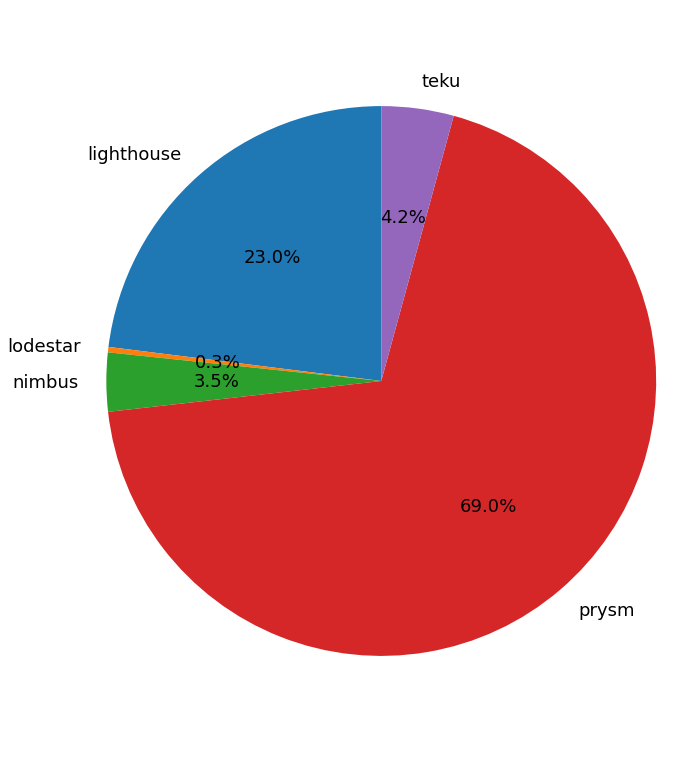

In [328]:
# Pie chart of all clients who had a distinct client unveiled via graffiti
sums = df_validator_client_mapped.groupby('client').sum()

labels = sums.index
sizes = sums['proposer']

# #colors
# colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots()

patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.rcParams['font.size'] = 18.0

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.rcParams["figure.figsize"] = [10,11]
plt.show()


In [329]:
sums

,proposer
client,
lighthouse,176131401
lodestar,2413674
nimbus,26427978
prysm,527622353
teku,32488113


In [330]:
df_validator_client_mapped.head()

,proposer,client
125616,1590,lighthouse
125617,4268,lighthouse
125619,23125,lighthouse
125622,32705,lighthouse
125627,1619,lighthouse


In [331]:
# Get full list of validators who have proposed
df_all_validators = pd.DataFrame()
df_all_validators['proposer'] = df
['proposer'].drop_duplicates()

df_all_validators = df_all_validators.merge(df_validator_client_mapped, how='left', on='proposer')
df_all_validators = df_all_validators.fillna('No visible client')
df_all_validators.head()

,proposer,client
0,8564,nimbus
1,18486,No visible client
2,12718,No visible client
3,17572,prysm
4,6657,No visible client


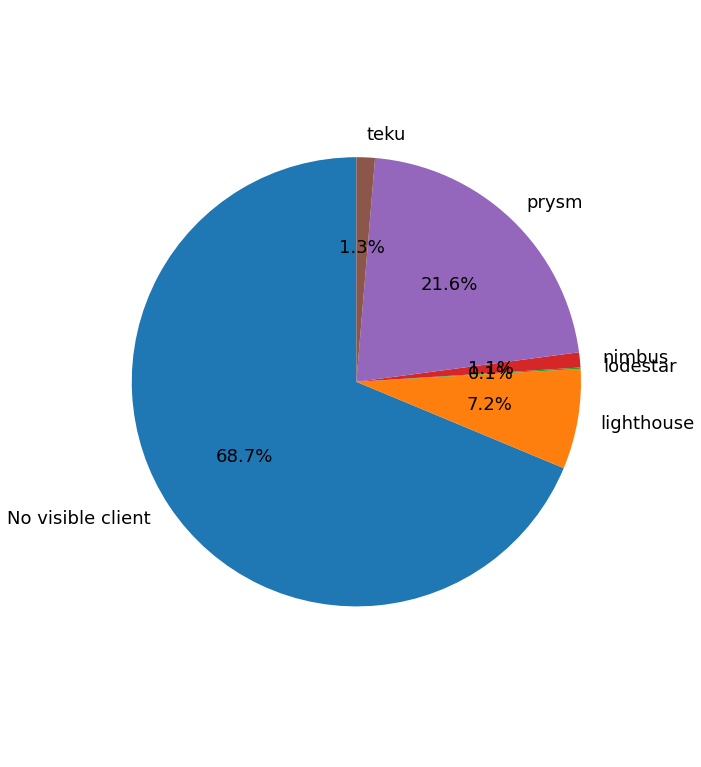

In [332]:
# Pie chart of all validators who have proposed and whether they have any client visible via graffiti
sums = df_all_validators.groupby('client').sum()

labels = sums.index
sizes = sums['proposer']

# #colors
# colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots()

patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.rcParams['font.size'] = 18.0

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.rcParams["figure.figsize"] = [10,11]
plt.show()


## Grouping remaining proposers with the same graffiti

In [353]:
#Refresh dataframe of all proposals with material graffiti
df_with_real_graffiti.head()

,id,slot,status,as_of,epoch,eth1data_depositcount,attestationscount,attesterslashingscount,depositscount,proposerslashingscount,...,blockroot,eth1data_blockhash,eth1data_depositroot,graffiti,graffiti_text,parentroot,randaoreveal,signature,stateroot,graffiti_decoded
125614,31251,12013,3,06-08-2020 05:02,375,26693,105,0,16,0,...,0x2bd19fd80bbe71525794d5b1cfa48898c1eba6a2d4c00ae6a69e938c5a676811,0xce7d20fcf367cd63bf723c0e0575f4b32f3c1dc230919e7d0014be89fd006500,0xaa1d2af475f88b7eaffabc3e69a6b0f908d7e0230917f0a7787f697dccde3707,0x706f61707368777a33682b72503646556d6359725766344d77795541494e4541,NaN,0x0458ce306226cdf14e687f51e987939de47f071afa217e29e94ebce67b59fa2d,0x86361943a233c782caadeef7be555cb25ad1b4fa63a6c5d713cb5b98aea05794c079272a2f40c391312680241533c90a0d715c01bcfedb18df0eb983d3152a60130c7e64300db517fa312f4a87c260b3ee73a9fd689d45f3e232ec0d6551d5b3,0x968b1add5694c08f73a26d3ca6ce76bc9ed49f97177c8d3d9aa43ca4ae5f229e961f903e8e81577b7da93ef9e74aad110d37c2955359abd2a19bd8358dfb11305c154301a9e6ed6e29f5b068dd9585623ce71fbb69789629faa549c2e1ba7007,0x080da95bcf381d249b0673b6ce9846b17782768289c0289312ec77fe77035303,poapshwz3h+rp6fumcyrwf4mwyuainea
125615,31298,12059,3,06-08-2020 05:11,376,26693,109,0,16,0,...,0xf65e3ad7d63b532a04a96c4f6b0ebb6b63504ce77fed1f878aa11b860225d913,0xce7d20fcf367cd63bf723c0e0575f4b32f3c1dc230919e7d0014be89fd006500,0xaa1d2af475f88b7eaffabc3e69a6b0f908d7e0230917f0a7787f697dccde3707,0x706f61707368777a33682b72503646556d6359725766344d77795541494e4541,NaN,0x2bd19fd80bbe71525794d5b1cfa48898c1eba6a2d4c00ae6a69e938c5a676811,0x806e40138605f6acc5293c2de15425d544f1550f57d28ceeb7f8ad44fdf5669b595bec2582998ee5fa63f083f80f99e90237bfedc99c474585a30827e07676319e4eefa53b31f9874a1b2ee867672d764f00714d4476d7e8d9e29a5a8ce5b13d,0x8565eaaecdc0c6d16e8a9ff113dbbc576028bc41700d3416a33230fecee8b54bd5995b310451e0b6c669d6ce955c1a2d0e94737ff9588853c3cd5c3fb2a654fe60a5fbf9ec3f224b05adf83228287b5ecf00e7ec386eb7e93a1ce380df50c0f0,0xa24ddec7046ce207fc0b039d2327a8f82337c9cb0f3344bc8bf71d5236327a52,poapshwz3h+rp6fumcyrwf4mwyuainea
125616,68106,48825,3,11-08-2020 07:45,1525,32701,18,0,16,0,...,0xddb22c4f6273a17f508aa94b39b8182f3e90815f62a7c56974cce73ec3a44164,0xae35f906c49b4edc598cc00893bdbdaa09f60fb2d0469776c8ca8cf5e50fa64a,0x15f0fe87de9ea62d735c6b1216c5a104c16d6c39eb17efe3729726e63373d3db,0x4c69676874686f7573652f76302e322e322d366436653038342b000000000000,NaN,0x7784fd77c544d3d1dfccccdd256050d35d43e6307669551fc742e4b291cdfdab,0x970cfc2e923dfa54d585ba71ba0dd2a3edcbc8e0a3c6619b4719ab9700f3f131f0c039fee2d7ce438384d6ef33fc37180e7a624bc84940393fd83fd7fd037eefa14935bdcfc1fa5c14f00747d2e59c3bbb52ba4bdc68c7dddb07d5f56eb2e918,0xb1704e420f2bab2ae5fe519f340270949dfc226a85ea0d5b7d5affb589fed170df9afca28c0ab9a842597b924162eb0212377d1a6f6c0765bcf09f93845b7d31e4cbacae972917987d88f9196bb444ae5e61df0fd4d81ea3ac45e9edd960977b,0x2eb71cb2963c130d9e582c042b1fdea265171b6c17c36a8c45871057a88b8913,lighthouse/v0.2.2-6d6e084+      
125617,69114,1061,3,04-08-2020 16:32,33,22889,14,0,16,0,...,0x5238ee9cf44ef6c6a7c949425f9cdf6b6bc1ce1c79d2a60ab96f0d6d799d940c,0xab027db69a8354b5feb2f87636d9e649876131264548ef1ae7f39ba18a1b525a,0xc2383c4a1de5bc755b84d53b86c5ff4aa55b519f4267bd3ed7e4387bfb758829,0x7139662f67696e616e2f6c69676874686f7573652d3663313762343639360000,NaN,0x218efd905bea68b87a54c5ac8f0be408c74a09f8e1c06ff32ff847d60104e7d1,0xa3468bb86c600b5998ce535759ac61788646580231e6a5cbd2361ecc919c42caa903f156ea80d48511a123e8a8c33e0a18556bb40118fb1d38f37da7ccad62a27ef0a404c865ca3b291034fffe22b50be53fce5332bd39ff1d7d2f53edb24450,0x8ae00ed9ab502e80f344c074a4d9ca294d6356cee664de03b7b2c1fc137c385ffee5cc7441cf0d1ec4294bbb1b5fc103085c977c24394ecee32b814df111fa0642996bdf186ebbac28f95411cf2cc4df73b85c613718c8150f21f7665323fd53,0xa7689ead921b025f3c27246de278f3117f6a56e7bf4ca5abf458713ff95eceff,q9f/ginan/lighthouse-6c17b4696  
125618,122759,125697,3,21-08-2020 23:59,3928,42062,11,0,16,0,...,0xf9e3d1735750744b3c80dc28f0020d22a21b88e637e761175d8e37dfbdcd106f,0xe2fc3a7e476120bf490d6dc5ad49aa0d58d

In [360]:
#Filter for any those rows where material graffiti was not already mapped
already_searched = ['poap', 'lighthouse', 'pry', 'nimbus', 'lodestar', 'teku']
unmapped_graffiti = df_with_real_graffiti[~df_with_real_graffiti["graffiti_decoded"].str.contains('|'.join(already_searched))][['proposer','graffiti_decoded']]
unmapped_graffiti.head()


,proposer,graffiti_decoded
125624,60214,"""pukara-1""                      "
125654,15123,c'mon mofos lets get finality   
125668,11169,validating_from_dappnode        
125672,21602,stakewise                       
125674,28337,beaconcha.in<3                  


In [361]:
unmapped_graffiti.groupby('proposer')['graffiti_decoded'].nunique().sort_values(ascending=False)

proposer
15144    7
38162    7
38073    7
38138    7
38170    6
        ..
40450    1
40452    1
40453    1
40454    1
31187    1
Name: graffiti_decoded, Length: 22504, dtype: int64

In [371]:
#Uhhhh
unmapped_graffiti[unmapped_graffiti['proposer']==15144]

,proposer,graffiti_decoded
129221,15144,"ouch, my finality               "
129451,15144,slash slash baby~               
129556,15144,jt - jt let me have this house! 
129587,15144,i stay noided                   
132030,15144,jt - jt let me have this house! 
137131,15144,i've seen footage               
147727,15144,step on my throat mommy         
147780,15144,step on my throat mommy         
166003,15144,i've seen footage               
167015,15144,step on my throat mommy         


In [396]:
# Get occurrences of the same graffiti across 100 or more different proposers
multiple_validators_same_graffiti = unmapped_graffiti.groupby('graffiti_decoded')['proposer'].nunique().sort_values(ascending=False)
over_100_validators_same_graffiti = multiple_validators_same_graffiti[multiple_validators_same_graffiti>100]
over_100_validators_same_graffiti

graffiti_decoded
stakewise                           3015
https://youtu.be/gtxpozkr2_s        2427
https://youtu.be/nlpfmqzell0        2247
🌎 thanks dr. bennett vogelman       2028
  ξ nlp ξ                           1958
let's go stars!                     1635
trust in science                    1608
stefan#3917                          979
ramen                                954
e pluribus unum                      902
"pukara-1"                           825
"pukara"                             631
eric.eth                             620
unknown                              591
drai is bae <3 #gooilersgo           555
go jackets! #cbj                     543
betep                                492
beaconcha.in@butta                   455
p2p.org - p2p validator              453
terence                              302
🍜                                    272
"pukara 0"                           264
xymf                                 255
** | etherchest.com | **             200

In [397]:
potential_extra_groupings = unmapped_graffiti[unmapped_graffiti['graffiti_decoded'].isin(over_100_validators_same_graffiti.index)].sort_values(by=['graffiti_decoded'])
potential_extra_groupings.head()

,proposer,graffiti_decoded
274713,6908,ξ nlp ξ                    
274593,11533,ξ nlp ξ                    
274594,11636,ξ nlp ξ                    
274595,10539,ξ nlp ξ                    
274596,11522,ξ nlp ξ                    


In [400]:
# To join into validators by identifier csv offline (excel)
potential_extra_groupings.to_csv('validators_with_same_graffiti.csv')